<a href="https://colab.research.google.com/github/apchavezr/Fundamentos-de-Estad-stica---Ciencia-de-Datos/blob/main/Ejercicio1_IQR_HistoricoConsumo_Con_Proposito_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1: Detección de valores atípicos con la regla del IQR

Este ejercicio tiene como objetivo aplicar técnicas de estadística descriptiva para identificar valores atípicos a partir de un conjunto de datos descargado del portal de **Datos Abiertos de Colombia**.

---
## 1. Cargar el conjunto de datos

Para este ejercicio se utilizará el conjunto de datos `HISTÓRICO CONSUMO POR ESTRATO`, disponible en:  
https://www.datos.gov.co/Vivienda-Ciudad-y-Territorio/HISTORICO-CONSUMO-POR-ESTRATO/cuit-be64

Se ha descargado previamente como `historico_consumo.csv` y contiene información sobre el consumo energético en diferentes estratos y meses.


## Propósito del tratamiento estadístico en este ejercicio

El propósito de este ejercicio es ilustrar cómo el tratamiento estadístico descriptivo puede contribuir a la detección de valores atípicos en datos reales, específicamente en registros de consumo energético por estrato en Colombia.

El análisis se enfoca en la variable `Consumo`, medida en kilovatios-hora, para determinar si existen observaciones que se alejan significativamente del comportamiento general de los datos. Para ello, se emplea la **regla del rango intercuartílico (IQR)**, una técnica robusta para identificar valores extremos sin asumir una distribución específica.

Mediante este ejercicio se espera que el estudiante:

- Aplique correctamente la regla del IQR para identificar valores atípicos.
- Comprenda la importancia de los cuartiles y la dispersión intercuartílica en el análisis exploratorio.
- Interprete gráficamente la presencia de outliers mediante el uso de boxplots.
- Adquiera criterio analítico para decidir si un valor atípico debe ser tratado, conservado o eliminado del análisis.

El enfoque está orientado a fortalecer la capacidad del estudiante para realizar análisis exploratorios con datos reales, utilizando herramientas estadísticas sólidas que permitan fundamentar decisiones en etapas posteriores del análisis de datos.


In [ ]:
import pandas as pd

# Cargar el archivo CSV descargado manualmente
df = pd.read_csv("HISTORICO_CONSUMO_POR_ESTRATO_20250405.csv")

# Mostrar las primeras filas
df.head()

,NIT,RAZON SOCIAL,AÑO,MES,MUNICIPIO,ESTRATO,No. SUSCRIPTORES ACUEDUCTO,CONSUMO M3 ACUEDUCTO,PROMEDIO CONSUMO ACUEDUCTO,No. SUSCRIPTORES ALCANTARILLADO,CONSUMO M3 ALCANTARILLADO,PROMEDIO CONSUMO ALCANTARILLADO
0,890.803.239-9,Empresa de Obras Sanitarias de Caldas - Empoca...,2015,ENERO,AGUADAS,Estrato1,1.043,8.761,8.40,848.000,7.674,9.05
1,890.803.239-9,Empresa de Obras Sanitarias de Caldas - Empoca...,2015,ENERO,AGUADAS,Estrato2,1.983,21.442,10.81,1.781,20.284,11.39
2,890.803.239-9,Empresa de Obras Sanitarias de Caldas - Empoca...,2015,ENERO,AGUADAS,Estrato3,434.000,5.511,12.70,416.000,5.209,12.52
3,890.803.239-9,Empresa de Obras Sanitarias de Caldas - Empoca...,2015,ENERO,AGUADAS,Estrato4,20.000,168.000,8.40,16.000,168.000,10.50
4,890.803.239-9,Empresa de Obras Sanitarias de Caldas - Empoca...,2015,ENERO,AGUADAS,Estrato5,1.000,0.000,0.00,0.000,0.000,0.00


---

## 2. Identificación de variable cuantitativa

La variable de interés es `Consumo`, que representa el consumo de energía en kilovatios-hora. Se aplicará la regla del IQR para detectar posibles valores atípicos.


In [ ]:
# Seleccionar y describir la variable
consumo = df['PROMEDIO CONSUMO ACUEDUCTO']
consumo.describe()

,PROMEDIO CONSUMO ACUEDUCTO
count,21816.000000
mean,77.228531
std,1157.002175
min,0.000000
25%,0.000000
50%,8.840000
75%,14.592500
max,128609.000000


---

## 3. Cálculo de cuartiles y aplicación de la regla del IQR

La regla del IQR se define como:

- IQR = Q3 - Q1
- Un dato es atípico si está por debajo de Q1 - 1.5*IQR o por encima de Q3 + 1.5*IQR


In [ ]:
Q1 = consumo.quantile(0.25)
Q3 = consumo.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = consumo[(consumo < limite_inferior) | (consumo > limite_superior)]
outliers.describe()

,PROMEDIO CONSUMO ACUEDUCTO
count,2487.000000
mean,613.940587
std,3379.521666
min,36.500000
25%,47.490000
50%,60.520000
75%,97.880000
max,128609.000000


---

## 4. Visualización con boxplot

Un boxplot permite identificar fácilmente la presencia de valores atípicos.


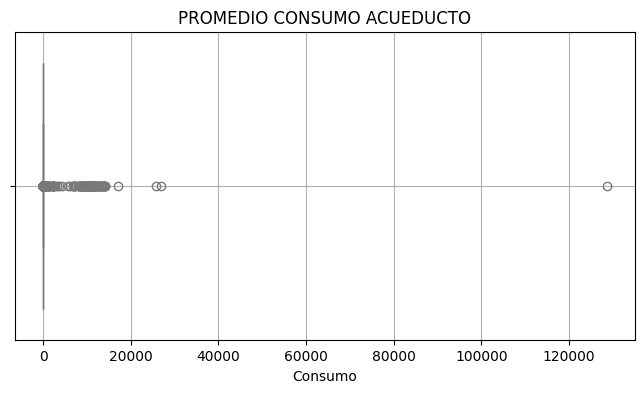

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=consumo, color='lightblue')
plt.title('PROMEDIO CONSUMO ACUEDUCTO')
plt.xlabel('Consumo')
plt.grid(True)
plt.show()

---

## 5. Análisis y justificación

- Se identificaron valores atípicos por encima de los límites definidos por la regla del IQR.
- Estos valores podrían representar consumos atípicos en ciertos estratos o periodos específicos.
- **Decisión:** Si el análisis busca caracterizar el consumo promedio, se podrían excluir. Si el propósito es identificar picos o anomalías, deben conservarse.

---

## ✅ Conclusión

La regla del IQR permite detectar valores extremos de forma robusta. Su tratamiento debe basarse en el contexto del análisis.

Una vez aplicado el tratamiento estadístico mediante la regla del IQR, se identifican los valores atípicos en la variable `Consumo`, correspondiente al consumo de energía eléctrica en kilovatios-hora. La presencia de estos valores puede deberse a diferentes causas, como errores de digitación, lecturas anómalas en medidores, cambios excepcionales en el comportamiento de los hogares o eventos particulares como cortes prolongados del servicio.

Desde el punto de vista estadístico, los valores atípicos son observaciones que se alejan de manera significativa del patrón general de los datos. Detectarlos permite:

- Prevenir que estos valores afecten medidas sensibles como la media o la desviación estándar.
- Evaluar si se trata de datos válidos pero infrecuentes, o errores que deben ser corregidos o excluidos.
- Mejorar la calidad del análisis posterior, como la construcción de modelos predictivos o la segmentación de usuarios.

El uso del IQR como criterio es apropiado en este contexto, ya que se trata de un método no paramétrico, robusto ante la asimetría y sin suposiciones estrictas sobre la distribución de los datos. Esta característica es especialmente útil cuando se trabaja con datos reales provenientes de sistemas abiertos, como registros administrativos o bases públicas.

Finalmente, la visualización mediante boxplots permite comunicar gráficamente la dispersión y la presencia de valores atípicos, lo cual es clave para una interpretación accesible por parte de públicos técnicos y no técnicos.

